# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Census Dataset from 1994.
2. I want to make a model that's able to predict whether a person makes above or below a threshold of 50K based off of the demographic data provided in the Census Data. The label would be the "income_binary" column, which provides whether an individual makes above or below 50K annually.
3. This would be a supervised binary classification problem as there are two possibilities and the label is given.
4. My features would mainly be age, workclass, education, marital status and race.
5. This would be a great way to see the relationship between these demographic statuses and income, allowing us to see which groups of people may require more aid.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print(df.columns)
print(df.shape)
df.head(100)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.0,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,50.0,United-States,<=50K
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K
97,37.0,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,48.0,United-States,>50K
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I plan to get rid of the 'fnlwgt' column as I don't think I can use that data effectively in my model.
2. I plan on mainly dealing with Nan values in numerical columns and one-hot encoding whichever features seem possible.
3. Based on my project type, I have to use something that can tackle binary classification. With that in mind, I've decided to implement a Logistic Regression model for this purpose.
4. I'll preprocess the data, standardize it and then split it into test and train data, before fitting it to the model. Afterwards, I'll run a GridSearch to find the optimal hyperparameter and then check on performance metrics, before finally testing it on the test data. I'll plot a ROC curve and show a confusion matrix along with the accuracy to give the full picture of the model's performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Data Preparation

In [5]:
# Drop Unnecesary Cols
df.drop(axis =1, inplace = True, columns = "fnlwgt")

#convert label to T/F
df['income_binary'] = df['income_binary'] == '>50K'

# NaN Counts

#finding cols that have nan counts
nan_count = df.isnull().sum()
nan_detected = nan_count != 0
nan_detected

#sorting which cols have nan counts and are int/float types
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float
to_impute = nan_detected & is_int_or_float
to_impute
to_impute = df.columns[to_impute]

#filling missing values with corresponding means
for col in to_impute:
    df[col].fillna(df[col].mean(), inplace = True)

#self-check
for colname in to_impute:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

#windsorizing education-num feature
df['education-num'] = df['education-num'].clip(lower=0.01, upper=0.99)


age missing values count :0
hours-per-week missing values count :0


In [6]:
# One Hot Encoding

to_encode = df.select_dtypes(include=['object']).columns.tolist()
to_encode = [col for col in to_encode if col != "income_binary"]

print(to_encode)

for c in to_encode:
    if df[c].isnull().any():
        df[c] = df[c].fillna('unavailable')

enc = OneHotEncoder(sparse_output=False)
encoded_array = enc.fit_transform(df[to_encode])

df_enc = pd.DataFrame(encoded_array, columns=enc.get_feature_names_out(to_encode))
df.drop(columns=to_encode, inplace=True)
df = pd.concat([df, df_enc], axis=1)

print(df.columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Puerto-Rico', 'native-country_Scotland',
       'native-country_South', 'native-country_Taiwan',
       'native-country_Thailand', 'native-country_Trinadad&Tobago',
       'native-country_United-States', 'native-country_Vietnam',
       'native-country_Yugoslavia', 'native-country_unavailable'],
      dtype='object', length=108)


### Model Initialization

In [7]:
# Create labeled examples
X = df.drop(columns=["income_binary"])
y = df["income_binary"]

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluate the default model using cross-validation
model_default = LogisticRegression(max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_default = cross_val_score(model_default, X_train, y_train, cv=kf, scoring='accuracy')
print(f'Initial Model Cross-Validation Scores: {cv_scores_default}')
print(f'Initial Model Mean Accuracy: {cv_scores_default.mean()}')

model_default.fit(X_train, y_train)

Initial Model Cross-Validation Scores: [0.84777363 0.85237991 0.84071961 0.85914875 0.85125055]
Initial Model Mean Accuracy: 0.8502544908493881


LogisticRegression(max_iter=1000)

In [8]:
#quickly check for class imbalance
class_distribution = y.value_counts()
print(class_distribution)


False    24720
True      7841
Name: income_binary, dtype: int64


There seems to be a decent amount of both classes in the label column, so I'll keep the data as it is.

### Model Evaluation

In [9]:
# Define the parameter grid for GridSearch
param_grid = {'C': [10**i for i in range(-5, 5)]}

print('Running Grid Search...')

# Initialize the model and GridSearch
model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model
grid_search = grid.fit(X_train, y_train)

print('Done')

# Get the best parameter and retrain the model
best_C = grid_search.best_params_['C']
model_best = LogisticRegression(C=best_C, max_iter=1000)
model_best.fit(X_train, y_train)

# Make best predictions on the test data
proba_predictions_best = model_best.predict_proba(X_test)[:, 1].tolist()
class_label_predictions_best = model_best.predict(X_test).tolist()

Running Grid Search...
Done


Accuracy:  85.3925683283857 %


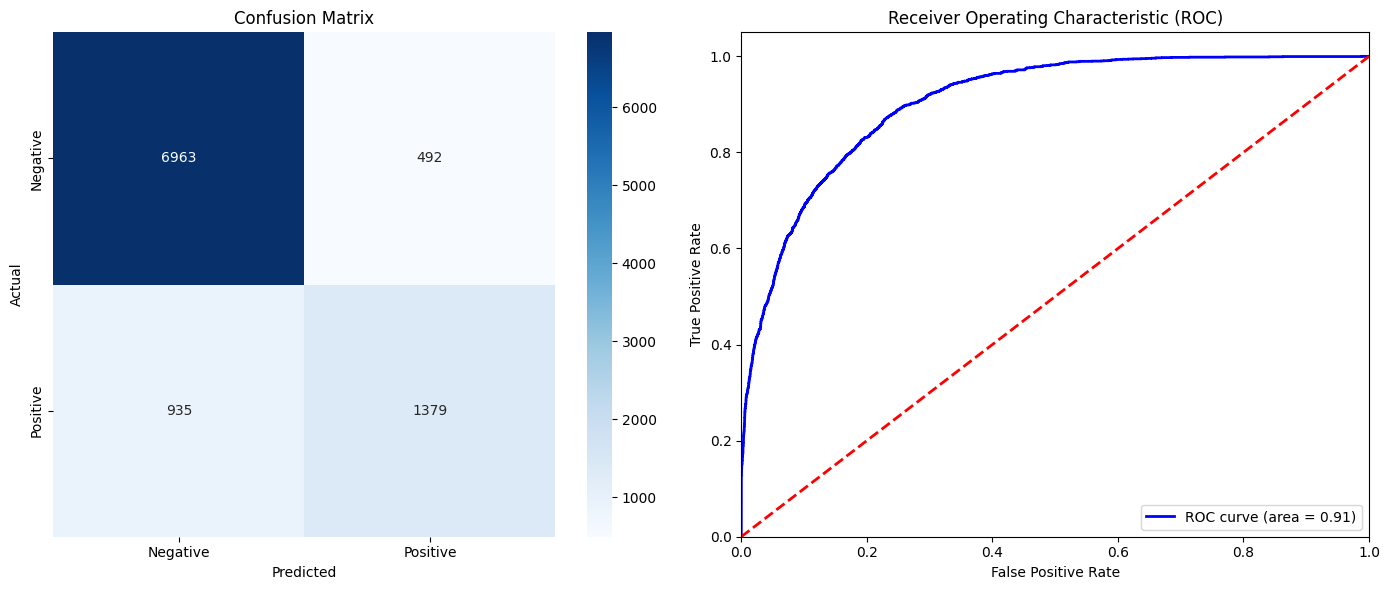

In [10]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, class_label_predictions_best)

accuracy = accuracy_score(y_test, class_label_predictions_best)
print("Accuracy: ", accuracy * 100, "%")

#plot confusion matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

fpr, tpr, _ = roc_curve(y_test, proba_predictions_best)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

As seen, the test accuracy of the model is around 85% to predict whether a person makes over 50K annually based off of the demographic data provided in the 1994 census, indicating the model is performing well. This claim is backed by the two plots with the Confusion Matrix and the ROC plot. There are mainly true positives and true negatives, and like seen in the AUC calculated, the model generated a high number of true positives compared to false positives as well.